![Logo](assets/logo.png)

Made by **Domonkos Nagy**

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Fortuz/rl_education/blob/main/5.%20Temporal%20Difference/frozen_lake.ipynb)

# Frozen Lake

Frozen lake involves crossing a frozen lake from start to goal without falling into any holes by walking over the frozen lake. The player may not always move in the intended direction due to the slippery nature of the frozen lake.

The game starts with the player at location [0,0] of the frozen lake grid world with the goal located at far extent of the world e.g. [3,3] for the 4x4 environment.
Holes in the ice are distributed in set locations.
The player makes moves until they reach the goal or fall in a hole.

![Example image](assets/frozen_lake.png)

This problem can be formulated with a finite, undiscounted MDP, where the states are the positions in the grid world, the actions are UP, DOWN, LEFT and RIGHT, and the reward is 1 for reaching the goal and 0 otherwise (even for falling in a hole). In this example, we use the `FrozenLake-v1` environment from the `Gymnasium` library to represent the problem, and use *Q-learning* to solve it.

In [1]:
import numpy as np
import gymnasium as gym
import time
from tqdm.notebook import trange
from IPython import display
import matplotlib.pyplot as plt

In [2]:
env = gym.make('FrozenLake-v1', render_mode='rgb_array')  # creating the environment

In [3]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table = np.zeros((state_space_size, action_space_size))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [4]:
# hyperparameters
num_episodes = 10_000
max_steps_per_episode = 100

alpha = 0.1 # learning rate
gamma = 0.99 # discount rate

epsilon = 1 # exploration rate
epsilon_max = 1
epsilon_min = 0.01
epsilon_decay_rate = 0.001

In [5]:
rewards_all_episodes = []

for episode in trange(num_episodes):
    state = env.reset()[0]

    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode):
        if np.random.rand() > epsilon:
            action = np.argmax(q_table[state,:])
        else:
            action = env.action_space.sample()

        new_state, reward, done, truncated, info = env.step(action)

        q_table[state, action] = q_table[state, action] * (1 - alpha) + \
            alpha * (reward + gamma * np.max(q_table[new_state, :]))

        state = new_state
        rewards_current_episode += reward

        if done:
            break

    epsilon = epsilon_min + (epsilon_max - epsilon_min) * np.exp(-epsilon_decay_rate * episode)
    
    rewards_all_episodes.append(rewards_current_episode)

# Calculate and print the average reward per thousand episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000

print("********Average reward per thousand episodes********\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

  0%|          | 0/10000 [00:00<?, ?it/s]

********Average reward per thousand episodes********

1000 :  0.04300000000000003
2000 :  0.20200000000000015
3000 :  0.3960000000000003
4000 :  0.5660000000000004
5000 :  0.6080000000000004
6000 :  0.6560000000000005
7000 :  0.6640000000000005
8000 :  0.6830000000000005
9000 :  0.6950000000000005
10000 :  0.6690000000000005


In [6]:
# Print updated Q-table
print("********Q-table********\n")
print(q_table)

********Q-table********

[[0.47940297 0.46477761 0.46269276 0.46229761]
 [0.33744243 0.22477467 0.3374423  0.44671849]
 [0.42289938 0.41917288 0.42220084 0.43144462]
 [0.31141389 0.29742689 0.24780766 0.42622236]
 [0.49716778 0.40759889 0.45812727 0.39926584]
 [0.         0.         0.         0.        ]
 [0.30241991 0.20082869 0.19599027 0.09685409]
 [0.         0.         0.         0.        ]
 [0.33229076 0.3406536  0.49576901 0.52401745]
 [0.50095718 0.57071473 0.31649738 0.43156954]
 [0.50243086 0.43261512 0.39664101 0.20175075]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.48625641 0.61254524 0.61189754 0.50273804]
 [0.70836976 0.75826801 0.71216195 0.69538448]
 [0.         0.         0.         0.        ]]


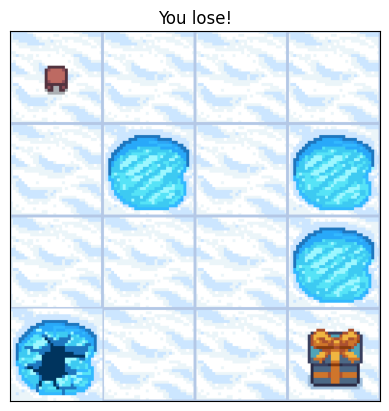

In [7]:
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
                
env.reset()
img = plt.imshow(env.render())
for episode in range(3):
    state = env.reset()[0]
    done = False

    plt.title(f"Episode #{episode+1}")
    for step in range(max_steps_per_episode):        
        action = np.argmax(q_table[state,:])        
        new_state, reward, done, truncated, info = env.step(action)

        img.set_data(env.render()) # just update the data
        display.display(plt.gcf())
        display.clear_output(wait=True)

        if done:
            plt.title("You " + ("win!" if reward == 1 else "lose!"))
            display.display(plt.gcf())
            display.clear_output(wait=True)
            time.sleep(1)
            break

        state = new_state

env.close()